#### Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

file_path = "traffic-signs-data/"
training_file = file_path + "train.p"
validation_file= file_path + "valid.p"
testing_file = file_path + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train, s_train, c_train = train['features'], train['labels'], train['sizes'], train['coords']
X_valid, y_valid, s_valid, c_valid = valid['features'], valid['labels'], valid['sizes'], valid['coords']
X_test, y_test, s_test, c_test = test['features'], test['labels'], test['sizes'], test['coords']

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results.

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import os
# done to activate packages from python to jupyter (works also on ipython)
import sys
sys.path.append('/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/')


In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import csv
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import cv2
import math



Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape:
      from train dataset =  (32, 32, 3)
      from validation dataset =  (32, 32, 3)
      from test dataset =  (32, 32, 3)
Number of classes:
      distinct labels in train dataset =  43
      distinct labels in validation dataset =  43
      distinct labels in test dataset =  43
      label count in csv =  43
 
Training samples distribution per class


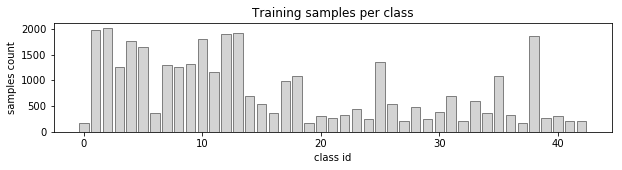

 
Validation samples distribution per class


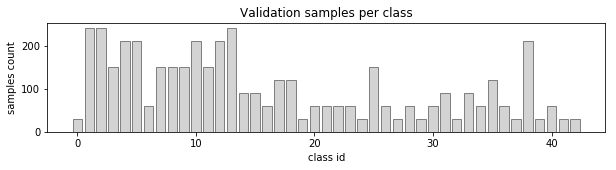

 
Testing samples distribution per class


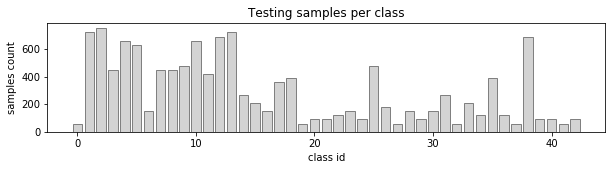

In [4]:
# TODO: Number of training / validation / testing examples
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
image_shape_v = X_valid[0].shape
image_shape_t = X_test[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]
n_classes_v = np.unique(y_valid).shape[0]
n_classes_t = np.unique(y_test).shape[0]

class_list = []
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        class_list.append(row['SignName'])

n_classes_csv = len(class_list)
        
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape:")
print("      from train dataset = ", image_shape)
print("      from validation dataset = ", image_shape_v)
print("      from test dataset = ", image_shape_t)
print("Number of classes:")
print("      distinct labels in train dataset = ", n_classes)
print("      distinct labels in validation dataset = ", n_classes_v)
print("      distinct labels in test dataset = ", n_classes_t)
print("      label count in csv = ", n_classes_csv)

print(" ")
print("Training samples distribution per class")

samples_count=[]    
for i in range(0, n_classes):
    samples_count.append(X_train[y_train == i].shape[0])
    
class_list = np.asarray(list(zip(class_list, samples_count)))

plt.figure(figsize=(10, 2))
plt.bar(range(0, n_classes), samples_count,color='lightgray',edgecolor='gray')
plt.title("Training samples per class")
plt.xlabel("class id")
plt.ylabel("samples count")
plt.show()

print(" ")
print("Validation samples distribution per class")

samples_count=[]    
for i in range(0, n_classes_v):
    samples_count.append(X_valid[y_valid == i].shape[0])

plt.figure(figsize=(10, 2))
plt.bar(range(0, n_classes), samples_count,color='lightgray',edgecolor='gray')
plt.title("Validation samples per class")
plt.xlabel("class id")
plt.ylabel("samples count")
plt.show()

print(" ")
print("Testing samples distribution per class")

samples_count=[]    
for i in range(0, n_classes_t):
    samples_count.append(X_test[y_test == i].shape[0])

plt.figure(figsize=(10, 2))
plt.bar(range(0, n_classes), samples_count,color='lightgray',edgecolor='gray')
plt.title("Testing samples per class")
plt.xlabel("class id")
plt.ylabel("samples count")
plt.show()

## Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

full list of signs with sample count


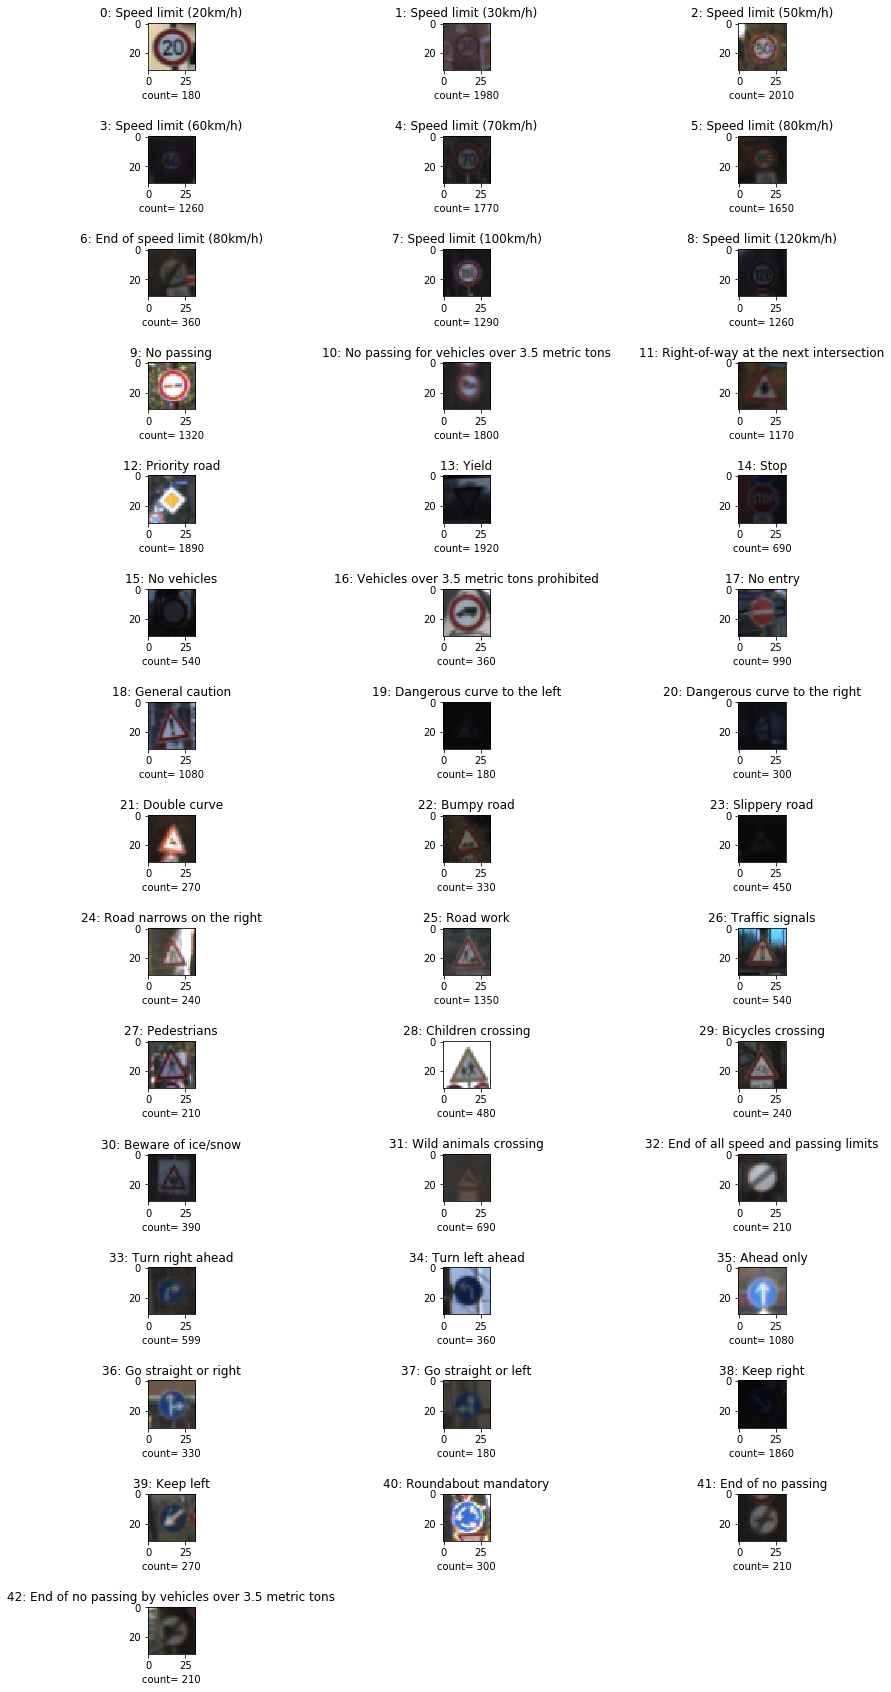

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

print("full list of signs with sample count")

plt.figure(figsize=(15, 30))
X_actClass = []

for i in range(0, n_classes):
    X_actClass = X_train[y_train == i]
    plt.subplot(math.ceil(n_classes/3*2), 3, math.floor(i/3)*3+i+1)
    plt.title( str(i) + ": " + class_list[i][0])
    plt.xlabel("count= " + str(X_actClass.shape[0]))
    plt.imshow(X_actClass[0, :, :, :], cmap="Greys_r")

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
b=0
def img_preproc(image):
    #image=image.squeeze()
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #image_histo = cv2.equalizeHist(image_gray)
    #image_gauss = cv2.GaussianBlur(image_gray, (5,5), 20.0)
    #image_sharp = cv2.addWeighted(image_gray, 2, image_gauss, -1, 0) 
    return np.expand_dims(image_gray,axis=3)

def img_zoom(image,i):
    scale_y=image_shape[1]/s_train[i][1]
    scale_x=image_shape[0]/s_train[i][0]
    y1=int(round(c_train[i][0]*scale_y))
    y2=int(round(c_train[i][2]*scale_y))
    x1=int(round(c_train[i][1]*scale_x))
    x2=int(round(c_train[i][3]*scale_x))
    return np.expand_dims(cv2.resize(image[y1:y2,x1:x2], (32,32), interpolation = cv2.INTER_AREA),axis=3)
    
def img_normalize(image):
    return image / 255 - .5

X_train_pp = np.expand_dims(np.zeros(X_train.shape)[:,:,:,0],axis=3)
X_valid_pp = np.expand_dims(np.zeros(X_valid.shape)[:,:,:,0],axis=3)
X_test_pp = np.expand_dims(np.zeros(X_test.shape)[:,:,:,0],axis=3)

X_train_aug1 = np.expand_dims(np.zeros(X_train.shape)[:,:,:,0],axis=3)

for i in range(0,len(X_train)):
    X_train_pp[i] = img_normalize(img_preproc(X_train[i]))
    X_train_aug1[i] = img_zoom(X_train_pp[i],i)
    
for i in range(0,len(X_valid)):
    X_valid_pp[i] = img_normalize(img_preproc(X_valid[i]))

for i in range(0,len(X_test)):
    X_test_pp[i] = img_normalize(img_preproc(X_test[i]))
    

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # This is added back by InteractiveShellApp.init_path()
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [7]:
from sklearn.utils import shuffle

img_per_class = 2020 * 2 # just above most represent sign x 2: around 175k images

X_train_temp = np.concatenate((X_train_pp, X_train_aug1),axis=0)
y_train_temp = np.concatenate((y_train, y_train),axis=0)
X_train_temp, y_train_temp = shuffle(X_train_temp, y_train_temp)

np.random.seed(1972)

def augment_brightness_camera_images(image):
    random_bright = .25 + np.random.uniform()
    return image * random_bright

def image_transform(img,rotate_flag,translate_flag,distortion_flag,brightness_flag):
    
    ang_range = 10
    distortion_range = 5
    trans_range = 5
    
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # distortion
    pts1 = np.float32([[0,0],[cols,0],[0,rows]])

    pt1 = distortion_range*np.random.uniform()-distortion_range/2
    pt1 = distortion_range*np.random.uniform()-distortion_range/2
    ptr2 = rows+distortion_range*np.random.uniform()-distortion_range/2
    ptc2 = cols+distortion_range*np.random.uniform()-distortion_range/2

    # Brightness

    pts2 = np.float32([[pt1,5],[ptr2,pt1],[5,ptc2]])
    distortion_M = cv2.getAffineTransform(pts1,pts2)
    
    img = img[:,:,0]
    
    if rotate_flag == 1:
        img = cv2.warpAffine(img,Rot_M,(cols,rows))
        
    if translate_flag == 1:
        img = cv2.warpAffine(img,Trans_M,(cols,rows))
        
    if distortion_flag == 1:
        img = cv2.warpAffine(img,distortion_M,(cols,rows))

    if brightness_flag == 1:
        img = augment_brightness_camera_images(img)
    
    return img

color, grayscale, equalized histogram, grayscale sharpen, equalized histogram sharpen


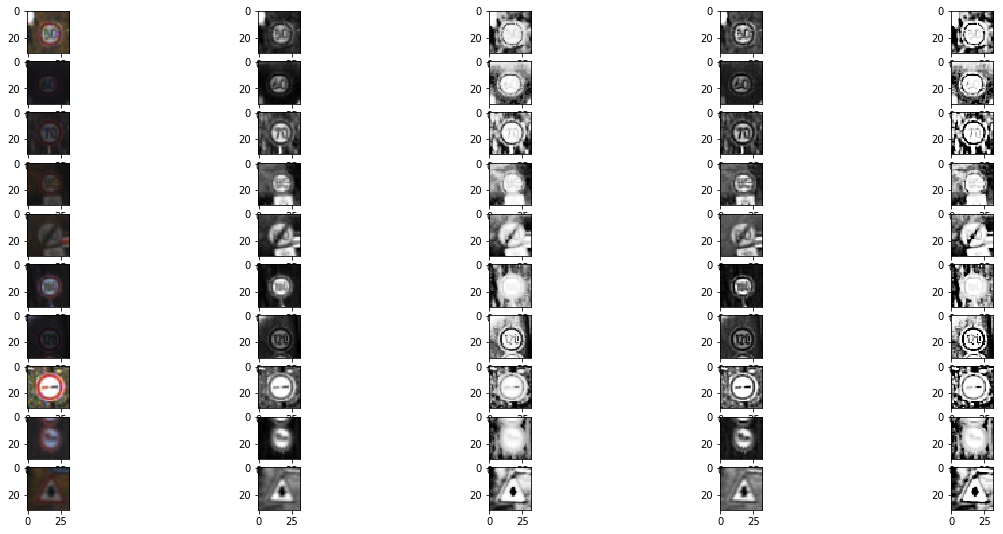

In [8]:

print("color, grayscale, equalized histogram, grayscale sharpen, equalized histogram sharpen")

plt.figure(figsize=(20, 40))

for i in range(2,12):#0, n_classes):
    X_actClass = X_train[y_train == i]
    
    plt.subplot(n_classes, 5, 5*i+1)
    img_base = X_actClass[0,:,:,:]
    plt.imshow(img_base)
    
    plt.subplot(n_classes, 5, 5*i+2)
    img_gray = cv2.cvtColor(img_base, cv2.COLOR_RGB2GRAY)
    plt.imshow(img_gray, cmap="Greys_r")    
    
    plt.subplot(n_classes, 5, 5*i+3)
    img_ppro = cv2.equalizeHist(img_gray)
    plt.imshow(img_ppro, cmap="Greys_r")
    
    plt.subplot(n_classes, 5, 5*i+4)
    img_gauss = cv2.GaussianBlur(img_gray, (5,5), 20.0)
    img_sharp = cv2.addWeighted(img_gray, 2, img_gauss, -1, 0)
    plt.imshow(img_sharp, cmap="Greys_r")
    
    plt.subplot(n_classes, 5, 5*i+5)
    img_gauss = cv2.GaussianBlur(img_ppro, (5,5), 20.0)
    img_sharp = cv2.addWeighted(img_ppro, 2, img_gauss, -1, 0)
    plt.imshow(img_sharp, cmap="Greys_r")
    
plt.show()

color, sharpen grayscale, sharpen r, sharpen g, sharpen b


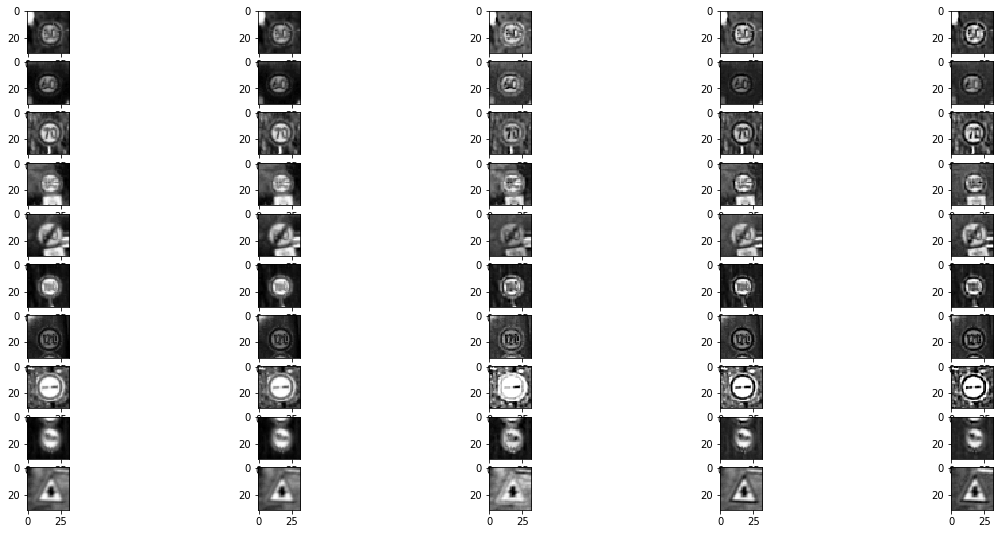

In [9]:

print("color, sharpen grayscale, sharpen r, sharpen g, sharpen b")

plt.figure(figsize=(20, 40))

for i in range(2,12):#0, n_classes):
    X_actClass = X_train[y_train == i]
    img_base = X_actClass[0,:,:,:]
    
    plt.subplot(n_classes, 5, 5*i+1)
    img_gray = cv2.cvtColor(img_base, cv2.COLOR_RGB2GRAY)
    plt.imshow(img_gray, cmap="Greys_r")
    
    plt.subplot(n_classes, 5, 5*i+2)
    img_grayS = cv2.GaussianBlur(img_gray, (5,5), 20.0)
    img_grayS = cv2.addWeighted(img_gray, 2, img_grayS, -1, 0)
    plt.imshow(img_gray, cmap="Greys_r")
    
    plt.subplot(n_classes, 5, 5*i+3)
    img_r = cv2.GaussianBlur(img_base[:,:,0], (5,5), 20.0)
    img_r = cv2.addWeighted(img_base[:,:,0], 2, img_r, -1, 0)
    plt.imshow(img_r, cmap="Greys_r") 
    
    plt.subplot(n_classes, 5, 5*i+4)
    img_g = cv2.GaussianBlur(img_base[:,:,1], (5,5), 20.0)
    img_g = cv2.addWeighted(img_base[:,:,1], 2, img_g, -1, 0)
    plt.imshow(img_g, cmap="Greys_r")    
    
    plt.subplot(n_classes, 5, 5*i+5)
    img_b = cv2.GaussianBlur(img_base[:,:,2], (5,5), 20.0)
    img_b = cv2.addWeighted(img_base[:,:,2], 2, img_b, -1, 0)
    plt.imshow(img_b, cmap="Greys_r")  
    
plt.show()



color, equalized histogram grayscale, equalized histogram r, equalized histogramg, equalized histogram b


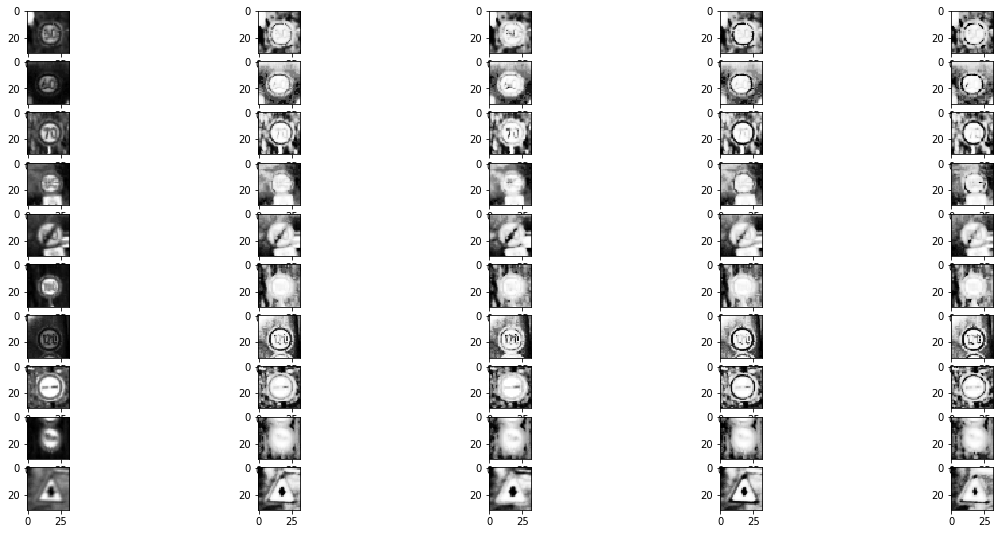

In [10]:
print("color, equalized histogram grayscale, equalized histogram r, equalized histogramg, equalized histogram b")

plt.figure(figsize=(20, 40))

for i in range(2,12):#0, n_classes):
    X_actClass = X_train[y_train == i]
    img_base = X_actClass[0,:,:,:]
    
    plt.subplot(n_classes, 5, 5*i+1)
    img_gray = cv2.cvtColor(img_base, cv2.COLOR_RGB2GRAY)
    plt.imshow(img_gray, cmap="Greys_r")
    
    plt.subplot(n_classes, 5, 5*i+2)
    img_gray = cv2.equalizeHist(img_gray)
    plt.imshow(img_gray, cmap="Greys_r")
    
    plt.subplot(n_classes, 5, 5*i+3)
    img_r = cv2.equalizeHist(img_base[:,:,0])
    plt.imshow(img_r, cmap="Greys_r")    
    
    plt.subplot(n_classes, 5, 5*i+4)
    img_g = cv2.equalizeHist(img_base[:,:,1])
    plt.imshow(img_g, cmap="Greys_r")    
    
    plt.subplot(n_classes, 5, 5*i+5)
    img_b = cv2.equalizeHist(img_base[:,:,2])
    plt.imshow(img_b, cmap="Greys_r")  
    
plt.show()

In [11]:
X_train_aug2 = list()
y_train_aug2 = list()

counter = 0
for i in range(0, n_classes):
    X_actClass = X_train_temp[y_train_temp == i]
    for j in range(X_actClass.shape[0],img_per_class):
        chosen_id = round(np.random.uniform() * (X_actClass.shape[0]-1))
        rotate_flag = round(np.random.uniform())
        translate_flag = round(np.random.uniform())
        shear_flag = round(np.random.uniform())
        brightness_flag = round(np.random.uniform())
        
        image = image_transform(X_actClass[chosen_id],rotate_flag,translate_flag,shear_flag,brightness_flag)
        X_train_aug2.append(image)
        y_train_aug2.append(i)
        counter += 1
    
    image_id = round(np.random.rand()*counter)
    image = X_train_aug2[image_id]

X_train_aug2 = np.expand_dims(np.asarray(X_train_aug2),axis=3)
y_train_aug2 = np.asarray(y_train_aug2)

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x,depth):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    keep_prob = 0.7
    
    # TODO: Layer 1: Convolutional. Input = 32x32xdepth. Output = 28x28x6. upgrade out=12
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, depth, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16. upgrade out=32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2-b: Convolutional. Input = 5x5x32. Output = 3x3x64. 
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
    # TODO: Pooling. Input = .... Output = ....
    #conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 3x3x64. Output = 576
    fc0   = flatten(conv3)
    fc0   = tf.nn.dropout(fc0, keep_prob)
    
    # TODO: Layer 3: Fully Connected. Input = 576. Output = 120. upgrade out=200 upgrade out=256
    fc1_W = tf.Variable(tf.truncated_normal(shape=(576, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob) 

    # TODO: Layer 4: Fully Connected. Input = 256. Output = 84. upgrade out=100 upgrade out=92
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1, conv2, conv3

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
X_train_final = np.concatenate((X_train_temp, X_train_aug2),axis=0)
y_train_final = np.concatenate((y_train_temp, y_train_aug2),axis=0)


In [14]:
X_train_final, y_train_final = shuffle(X_train_final, y_train_final)

In [15]:
X_train_full=X_train_final
y_train_full=y_train_final

In [16]:
from sklearn.model_selection import train_test_split

print(X_train_final.shape)
X_train_final, X_lixo, y_train_final, y_lixo = train_test_split(X_train_full, y_train_full, test_size=0.0) # 100%
print(X_train_final.shape)


(173720, 32, 32, 1)
(173720, 32, 32, 1)


In [17]:
import tensorflow as tf
tf.reset_default_graph()

EPOCHS = 200
BATCH_SIZE = 128
rate = 0.0005

#training="input"
training="output"

if training == "input":
    train_group=X_train
    valid_group=X_valid
    test_group=X_test
    start_depth=3
else:
    train_group=X_train_final
    valid_group=X_valid_pp
    test_group=X_test_pp
    start_depth=1

x = tf.placeholder(tf.float32, (None, 32, 32, start_depth))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

logits, conv1, conv2, conv3 = LeNet(x, depth=start_depth)
##
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
##
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples
##
accuracy_log = list()
loss_log = list()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_group[offset:end], y_train_final[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy, training_loss = evaluate(train_group, y_train_final)
        validation_accuracy, validation_loss = evaluate(valid_group, y_valid)
        accuracy_log.append((training_accuracy,validation_accuracy))
        loss_log.append((training_loss,validation_loss))
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.3f}".format(training_loss))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafSignClass')
    print("Model saved")

Training...

EPOCH 1 ...
Training Loss = 1.987
Validation Loss = 1.822
Training Accuracy = 0.462
Validation Accuracy = 0.474

EPOCH 2 ...
Training Loss = 1.362
Validation Loss = 1.263
Training Accuracy = 0.619
Validation Accuracy = 0.619

EPOCH 3 ...
Training Loss = 1.013
Validation Loss = 0.971
Training Accuracy = 0.712
Validation Accuracy = 0.717

EPOCH 4 ...
Training Loss = 0.832
Validation Loss = 0.794
Training Accuracy = 0.763
Validation Accuracy = 0.765

EPOCH 5 ...
Training Loss = 0.672
Validation Loss = 0.729
Training Accuracy = 0.808
Validation Accuracy = 0.795

EPOCH 6 ...
Training Loss = 0.577
Validation Loss = 0.650
Training Accuracy = 0.834
Validation Accuracy = 0.808

EPOCH 7 ...
Training Loss = 0.507
Validation Loss = 0.596
Training Accuracy = 0.854
Validation Accuracy = 0.832

EPOCH 8 ...
Training Loss = 0.472
Validation Loss = 0.586
Training Accuracy = 0.864
Validation Accuracy = 0.842

EPOCH 9 ...
Training Loss = 0.414
Validation Loss = 0.488
Training Accuracy = 0.880

EPOCH 73 ...
Training Loss = 0.119
Validation Loss = 0.422
Training Accuracy = 0.972
Validation Accuracy = 0.934

EPOCH 74 ...
Training Loss = 0.123
Validation Loss = 0.389
Training Accuracy = 0.971
Validation Accuracy = 0.932

EPOCH 75 ...
Training Loss = 0.122
Validation Loss = 0.427
Training Accuracy = 0.971
Validation Accuracy = 0.930

EPOCH 76 ...
Training Loss = 0.117
Validation Loss = 0.403
Training Accuracy = 0.971
Validation Accuracy = 0.932

EPOCH 77 ...
Training Loss = 0.111
Validation Loss = 0.385
Training Accuracy = 0.974
Validation Accuracy = 0.935

EPOCH 78 ...
Training Loss = 0.125
Validation Loss = 0.450
Training Accuracy = 0.971
Validation Accuracy = 0.931

EPOCH 79 ...
Training Loss = 0.131
Validation Loss = 0.394
Training Accuracy = 0.967
Validation Accuracy = 0.932

EPOCH 80 ...
Training Loss = 0.116
Validation Loss = 0.374
Training Accuracy = 0.973
Validation Accuracy = 0.942

EPOCH 81 ...
Training Loss = 0.123
Validation Loss = 0.392
Training Accuracy = 0.970
Val

EPOCH 145 ...
Training Loss = 0.116
Validation Loss = 0.404
Training Accuracy = 0.978
Validation Accuracy = 0.945

EPOCH 146 ...
Training Loss = 0.104
Validation Loss = 0.376
Training Accuracy = 0.979
Validation Accuracy = 0.944

EPOCH 147 ...
Training Loss = 0.108
Validation Loss = 0.391
Training Accuracy = 0.978
Validation Accuracy = 0.945

EPOCH 148 ...
Training Loss = 0.099
Validation Loss = 0.325
Training Accuracy = 0.979
Validation Accuracy = 0.946

EPOCH 149 ...
Training Loss = 0.103
Validation Loss = 0.371
Training Accuracy = 0.979
Validation Accuracy = 0.947

EPOCH 150 ...
Training Loss = 0.102
Validation Loss = 0.369
Training Accuracy = 0.980
Validation Accuracy = 0.952

EPOCH 151 ...
Training Loss = 0.112
Validation Loss = 0.393
Training Accuracy = 0.978
Validation Accuracy = 0.943

EPOCH 152 ...
Training Loss = 0.105
Validation Loss = 0.383
Training Accuracy = 0.978
Validation Accuracy = 0.946

EPOCH 153 ...
Training Loss = 0.116
Validation Loss = 0.378
Training Accuracy = 

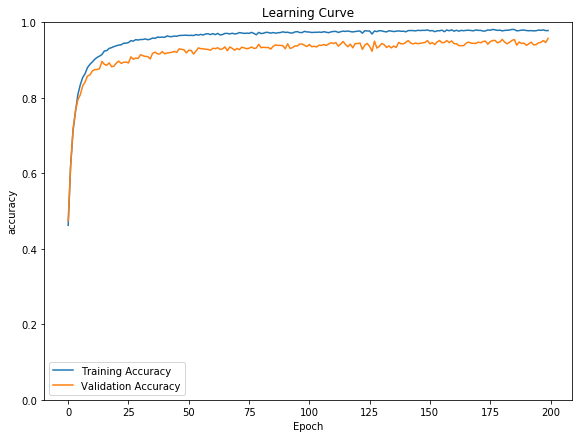

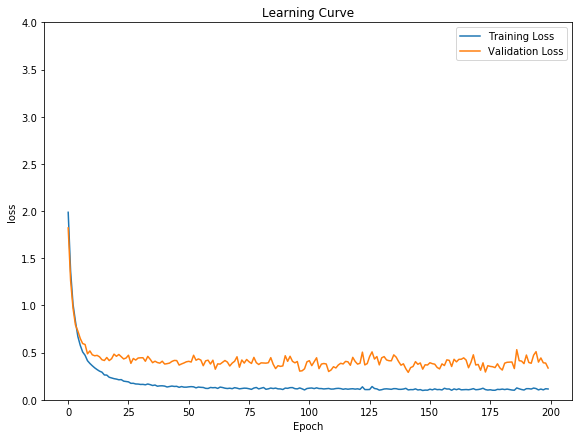

In [18]:
test_tag = "cv1_5_12_cv2_5_32_cv3_3_64_100perc_200ep"

plt.figure(figsize=(8,6))
plt.title('Learning Curve')
plt.plot([accu[0] for accu in accuracy_log])
plt.plot([accu[1] for accu in accuracy_log])
plt.ylim([0.0,1.])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.tight_layout()
plt.ylabel('accuracy')
plt.xlabel('Epoch');
plt.savefig('jcLogs/learning_curve_accuracy_{}.png'.format(test_tag))

plt.figure(figsize=(8,6))
plt.title('Learning Curve')
plt.plot([loss[0] for loss in loss_log])
plt.plot([loss[1] for loss in loss_log])
plt.ylim([0.,4.])
plt.legend(['Training Loss','Validation Loss'])
plt.tight_layout()
plt.ylabel('loss')
plt.xlabel('Epoch');
plt.savefig('jcLogs/learning_curve_loss_{}.png'.format(test_tag))

np.savetxt('jcLogs/loss_{}.out'.format(test_tag), loss_log, delimiter=',')
np.savetxt('jcLogs/accu_{}.out'.format(test_tag), accuracy_log, delimiter=',')

In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, test_loss = evaluate(test_group, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./trafSignClass
Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

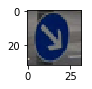

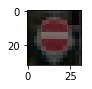

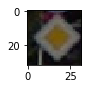

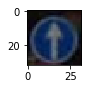

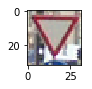

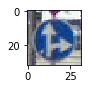

[38 17 12 35 13 36]


In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

myImages = []

for file in os.listdir("jcImages"):
    if file.endswith(".png"):
        image = cv2.imread(os.path.join("jcImages", file))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        myImages.append(image)
        plt.figure(figsize=(1, 1))
        plt.imshow(image)
        plt.show()

myImages = np.asarray(myImages)
myImages_label = list()
myImages_label.append(38)
myImages_label.append(17)
myImages_label.append(12)
myImages_label.append(35)
myImages_label.append(13)
myImages_label.append(36)

myImages_label = np.asarray(myImages_label)
print(myImages_label)

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./trafSignClass


/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # This is added back by InteractiveShellApp.init_path()


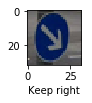

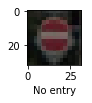

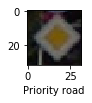

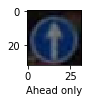

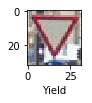

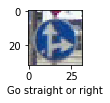

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

myImages_pp = np.expand_dims(np.zeros(myImages.shape)[:,:,:,0],axis=3)
myImages_pp = myImages_pp[:,:,:,0]

counter=0
for image in myImages:
    #image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    myImages_pp[counter] = img_preproc(image)[:,:,0]
    counter += 1

myImages_pp = np.expand_dims(myImages_pp,axis=3)

with tf.Session() as sess:
    saver.restore(sess, './trafSignClass')
    
    prob = sess.run(logits, feed_dict={x: myImages_pp, keep_prob: 1.0})    
    predicts = sess.run(tf.nn.top_k(prob, k=5, sorted=True))

counter=0
for image in myImages:
    plt.figure(figsize=(1, 1))
    plt.xlabel(class_list[predicts.indices[counter, 0],0])
    plt.imshow(image)
    plt.show()
    counter += 1


### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, test_loss = evaluate(myImages_pp, myImages_label)
    print("Test Accuracy = {:.2f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./trafSignClass
Test Accuracy = 1.00


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out ofa possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

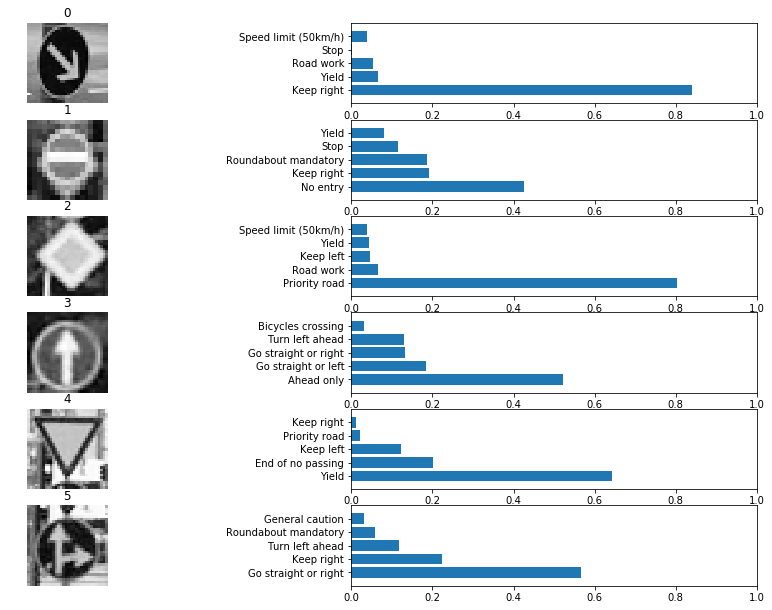

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#myImages_pp = myImages_pp[:,:,:,0]
plt.figure(figsize=(16, 21))
for i in range(6):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(myImages_pp[i][:,:,0], cmap="Greys_r") 
    plt.title(i)
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.axis([0, 1., 0, 6])
    #plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    plt.barh(np.arange(1, 6, 1), (np.absolute(predicts.values[i, :]/sum(np.absolute(predicts.values[i, :])))))
    #labs=[class_list[j] for j in signs_top_5.indices[i]]
    labs=[class_list[j][0] for j in predicts.indices[i, :]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in responseto a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./trafSignClass
convolution #1
(32, 32, 1)
(6, 32, 32, 1)


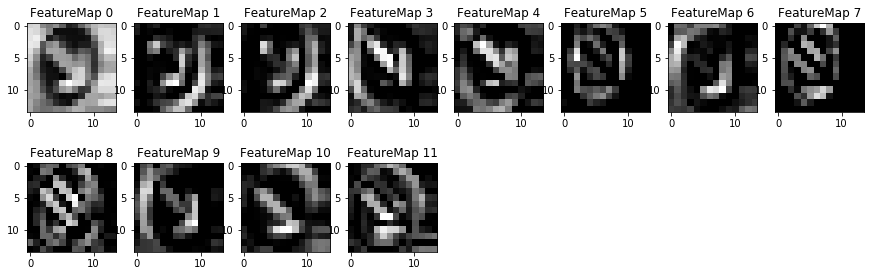

In [25]:
with tf.Session() as sess:
    saver.restore(sess, './trafSignClass')
    print("convolution #1")
    print(myImages_pp[0].shape)
    print(myImages_pp.shape)
    outputFeatureMap(myImages_pp,conv1)

INFO:tensorflow:Restoring parameters from ./trafSignClass
convolution #2


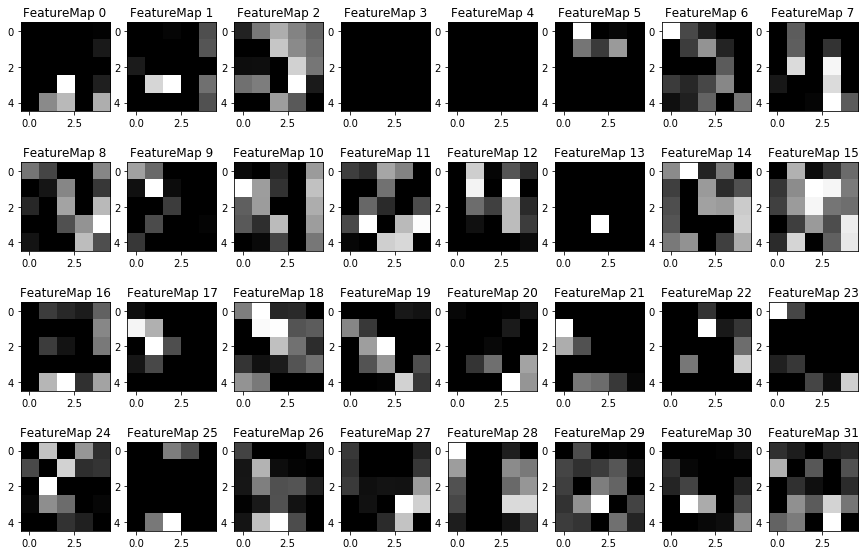

In [26]:
with tf.Session() as sess:
    saver.restore(sess, './trafSignClass')
    print("convolution #2")
    outputFeatureMap(myImages_pp,conv2)

INFO:tensorflow:Restoring parameters from ./trafSignClass
convolution #3


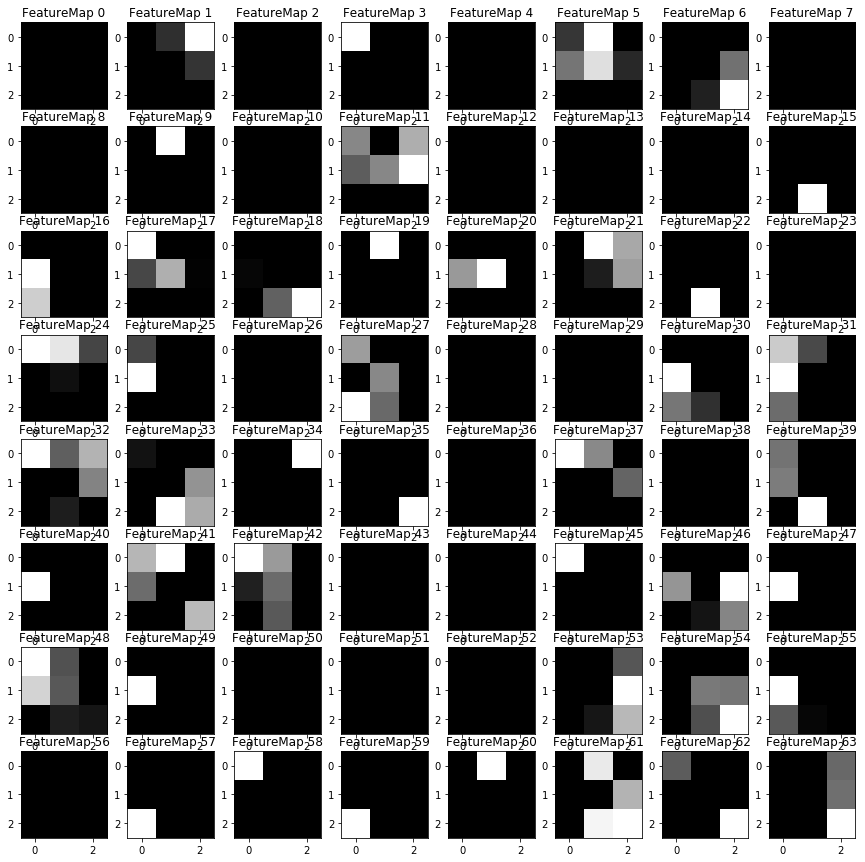

In [27]:
with tf.Session() as sess:
    saver.restore(sess, './trafSignClass')
    print("convolution #3")
    outputFeatureMap(myImages_pp,conv3)